# Michell Luiz Costalonga

# Exercícios - Módulo 8


<br><br>

### Considere o dataset abaixo:

In [1]:
# Importando bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.utils import shuffle

# Fazendo leitura do arquivo de dados
df = pd.read_csv("dataframe_exercicio_modulo_8.csv")

# Imprimindo a quantidade de linhas e colunas do arquivo
print('O arquivo posussi %d linhas e %d colunas.' %(df.shape[0], df.shape[1]))

# Imprimindo as primeiras 5 linhas do arquivo
df.head()

O arquivo posussi 2460 linhas e 5 colunas.


,ind_pop_cid,perc_pol,taxa_crim,nivel_ed,crimes
0,1.0,7.185471,62.082693,10.0,77
1,1.0,24.456750,88.244380,6.0,202
2,1.0,19.791772,94.930257,1.0,348
3,4.0,10.089496,41.791507,6.0,114
4,3.0,34.697495,67.615795,1.0,47


Descrição das variáveis:

ind_pop_cid = índice entre 1 e 5, indicando o tamanho da população de uma cidade; quanto maior o índice, maior a cidadel;

perc_pol = percentual de policiais ativos na cidade;

taxa_crim = taxa de criminalidade histórica da cidade;

nivel_ed = nível educacional médio da cidade;

crimes = quantidade de crimes registrados no mês vigente;

### Verificando os tipos dos dados

In [2]:
tipos = df.dtypes
tipos

ind_pop_cid    float64
perc_pol       float64
taxa_crim      float64
nivel_ed       float64
crimes           int64
dtype: object

### Verificando se existem dados nulos (NaN)

In [3]:
dados_nulos = df.isnull().sum()
dados_nulos

ind_pop_cid    0
perc_pol       0
taxa_crim      0
nivel_ed       0
crimes         0
dtype: int64

## Parte 1:

Os exercícios abaixo tratarão a respeito da criação de modelos de aprendizado de máquina. Vimos que precisamos controlar o overfitting dos modelos e medir a capacidade de generalização dos mesmos. Para isso, é interessante termos os dados disponíveis divididos em treino/validação/teste. 

#### Crie uma função para fazer a divisão de treino/teste.

Esta função deve ter dois parâmetros de entrada:

    1- dataframe disponível;
    2- percentual do dataset que será disponibilizado para os dados de teste;
    
e deve retornar dois dataframes.

(__Exemplo:__ Se o dataframe disponível possui 100 linhas e queremos 25% dos dados para teste, então a função deve retornar dois dataframes, um com 75 linhas (o dataset de treino) e outro com as 25 linhas restantes (o dataset de teste).)

In [4]:
# Criando uma função que divide os dados do dataframe em função de uma porcentagem informada.
# df_ é o dataframe de entrada e p é a porcentagem (0 < p < 1).
# A função irá retornar dois dataframes df1 e df2, por isso, deve-se declarar duas variáveis ao usar a função.
# Para a função abaixo, caso o segundo parâmetro "p" não seja informado, será considerado um valor padrão igual a 0.75.
# Isso é, 75% dos dados será usado para treino (df1) e 25% dos dados para teste (df2)

def divide_dados(df_, p = 0.75):
    # Embaralhando o dataframe de forma aleatória.
    df_ = shuffle(df_)
    
    # Dividindo o dataframe em dados para treino e teste
    df_treino = df_.iloc[:int(round(df_.shape[0] * p, 0)), :]
    df_teste = df_.iloc[int(round(df_.shape[0] * p, 0)):, :]
    
    print('O dataframe original possui %d linhas e %d colunas.' %(df_.shape[0], df_.shape[1]), end='\n\n')
    
    print('***** OS DF DE TREINO E DE TESTE FORAM CRIADOS A PARTIR DO DF ORIGINAL APÓS UMA ORGANIZAÇÃO ALEATÓRIA DAS LINHAS. *****', end='\n\n')
    print('O dataframe de treino poussi %d linhas e %d colunas.' %(df_treino.shape[0], df_treino.shape[1]), end='\n\n')
    print('O dataframe de teste poussi %d linhas e %d colunas.' %(df_teste.shape[0], df_teste.shape[1]), end='\n\n')
    print('A soma do número de linhas dos dataframes de treino e de teste é %d.' %(df_treino.shape[0] + df_teste.shape[0]))
    
    return df_treino, df_teste

per = 0.8
df_treino, df_teste = divide_dados(df, per)

# Imprimindo as cinco primeiras linhas do dataframe de treino:
df_treino.head()

O dataframe original possui 2460 linhas e 5 colunas.

***** OS DF DE TREINO E DE TESTE FORAM CRIADOS A PARTIR DO DF ORIGINAL APÓS UMA ORGANIZAÇÃO ALEATÓRIA DAS LINHAS. *****

O dataframe de treino poussi 1968 linhas e 5 colunas.

O dataframe de teste poussi 492 linhas e 5 colunas.

A soma do número de linhas dos dataframes de treino e de teste é 2460.


,ind_pop_cid,perc_pol,taxa_crim,nivel_ed,crimes
611,4.0,4.091551,52.447571,4.0,253
778,1.0,21.185762,51.698810,6.0,21
2307,1.0,7.849608,76.965343,6.0,294
2417,4.0,5.618181,91.118065,2.0,431
1036,2.0,11.941626,31.295252,2.0,122


In [5]:
# Imprimindo as cinco primeiras linhas do dataframe de teste:
df_teste.head()

,ind_pop_cid,perc_pol,taxa_crim,nivel_ed,crimes
1583,2.0,5.011095,47.611034,8.0,124
39,5.0,8.091991,32.353644,9.0,61
192,5.0,2.811208,38.921669,3.0,221
146,4.0,16.802162,38.546419,8.0,57
1210,3.0,19.447267,36.567842,2.0,78


## Parte 2:

### 1 - 

Usando __apenas UMA variável__, crie modelos de aprendizado de máquina para prever a quantidade de crimes a partir desta única variável. Justifique a escolha desta variável.

Instancie vários modelos e compare-os de acordo com as métricas de performance. Indique quais modelos estão sofrendo overfitting. 

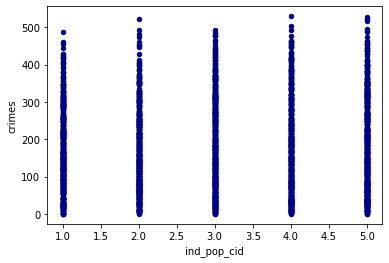

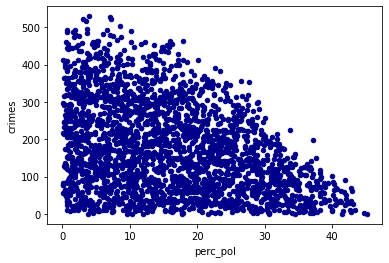

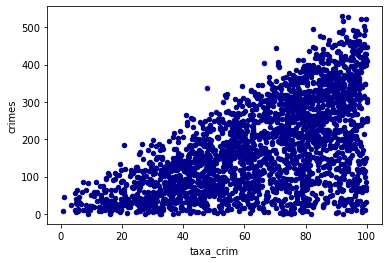

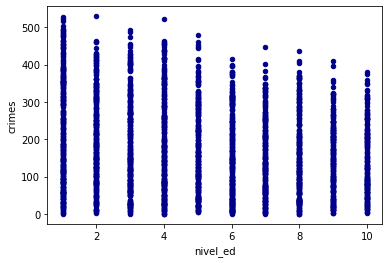

In [6]:
# Criando gráficos de cada variável com a variável target para verificar se há alguma 
# que possa ser usada para criar modelos de aprendizado de máquina
for item in df_treino.columns:
    if (item != 'crimes'):
        df.plot.scatter(x=item, y='crimes', c='DarkBlue')
    else:
        continue

In [7]:
# Verificando o índice de correlação das variáveis com a variável target.
df_treino.corr(method='pearson')

,ind_pop_cid,perc_pol,taxa_crim,nivel_ed,crimes
ind_pop_cid,1.000000,0.008434,-0.066673,0.000406,0.082482
perc_pol,0.008434,1.000000,0.394239,-0.079716,-0.371436
taxa_crim,-0.066673,0.394239,1.000000,0.083595,0.586305
nivel_ed,0.000406,-0.079716,0.083595,1.000000,-0.196628
crimes,0.082482,-0.371436,0.586305,-0.196628,1.000000


Através dos gráficos, não é possível observar qual parâmetro descreve melhor a variável target. Devido a isso, considerarei o índice de correlação de Pearson. Com isso, usaremos a variável "taxa_crim" para prever a variável target "crimes", pois a mesma apresenta alta correlação positiva com a variável target.

### Iniciaremos aplicando o modelo de regressão linear.

Antes disso, criaremos o gráfico para identificar a melhor faixa de valores para $\Theta_0$ e $\Theta_1$

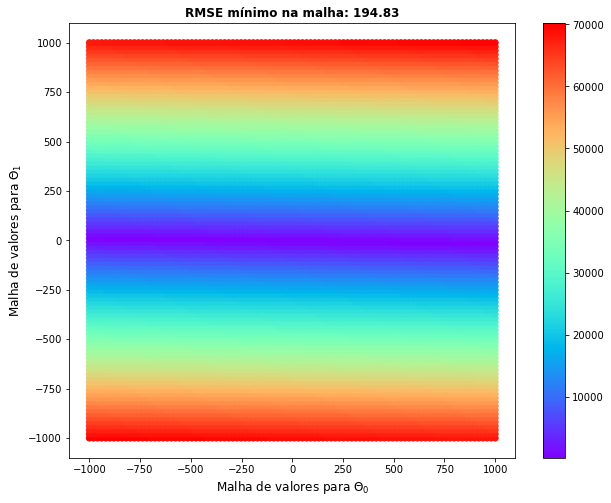

In [8]:
# Funções para determinar MSE e RMSE e calcular o valor predito
def funcao_linear(x, theta0, theta1):
    pred = theta0 + theta1 * x
    pred.name = None
    return pred

def MSE(y, y_pred):
    return np.mean((y - y_pred)**2)

def RMSE(y, y_pred):
    return np.sqrt(np.mean((y - y_pred)**2))

# Criando um gráfico para avaliar o menor valor para o RMSE
mesh = 1000
div = 100
thetas_0 = np.linspace(mesh * (-1), mesh, div)
thetas_1 = np.linspace(mesh * (-1), mesh, div)

grid0, grid1 = np.meshgrid(thetas_0, thetas_1)
grid0 = np.ravel(grid0)
grid1 = np.ravel(grid1)

X = df['taxa_crim']
y = df['crimes']

RMSE_list = [RMSE(y = y, y_pred = funcao_linear(x = X, theta0 = t[0], theta1 = t[1])) for t in zip(grid0, grid1)]

RMSE_min = np.min(RMSE_list)

plt.figure(figsize=[10,8])
plt.title("RMSE mínimo na malha: " + str(np.round(RMSE_min,2)), fontweight = 'bold', fontsize = 12)
plt.scatter(grid0, grid1, c = RMSE_list, cmap = plt.cm.rainbow)
plt.xlabel(r"Malha de valores para $\Theta_0$", fontsize = 12)
plt.ylabel(r"Malha de valores para $\Theta_1$", fontsize = 12)
plt.colorbar()
plt.show()

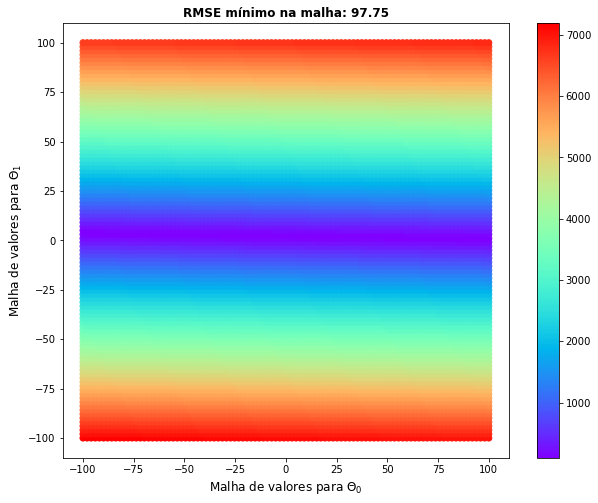

In [9]:
# Criando outra malha com valores menores.

# Criando um gráfico para avaliar o menor valor para o RMSE
mesh = 100
div = 100
thetas_0 = np.linspace(mesh * (-1), mesh, div)
thetas_1 = np.linspace(mesh * (-1), mesh, div)

grid0, grid1 = np.meshgrid(thetas_0, thetas_1)
grid0 = np.ravel(grid0)
grid1 = np.ravel(grid1)

X = df['taxa_crim']
y = df['crimes']

RMSE_list = [RMSE(y = y, y_pred = funcao_linear(x = X, theta0 = t[0], theta1 = t[1])) for t in zip(grid0, grid1)]

RMSE_min = np.min(RMSE_list)

plt.figure(figsize=[10,8])
plt.title("RMSE mínimo na malha: " + str(np.round(RMSE_min,2)), fontweight = 'bold', fontsize = 12)
plt.scatter(grid0, grid1, c = RMSE_list, cmap = plt.cm.rainbow)
plt.xlabel(r"Malha de valores para $\Theta_0$", fontsize = 12)
plt.ylabel(r"Malha de valores para $\Theta_1$", fontsize = 12)
plt.colorbar()
plt.show()

Verificamos que a região próxima de zero para $\Theta_1$ para diversos valores de $\Theta_0$ é a que apresenta menor RMSE. Iremos usar o algorítmo de regressão linear do scikit-learn para nos auxiliar na seleção dos dois parâmetros que ajuste melhor a variável target.

In [10]:
# Instanciando o modelo de regressão linear.
lm = LinearRegression()

# Transformando as variáveis do dataframe (series) para numpy array
X = df_treino['taxa_crim'].values.reshape(-1,1)
Y = df_treino['crimes'].values.reshape(-1,1)

# Usando os dados para treinar o algorítmo:
lm.fit(X, Y)

# Valores preditos a partir do modelo treinado
ypred = lm.predict(X)

# Por último, calcularemos o RMSE usando os valores preditos pelo modelo de regressão linear.
RMSE_mr = RMSE(Y, ypred)

print('O valor de RMSE considerando o modelo de regressão linear simples é %d.' %(RMSE_mr))

O valor de RMSE considerando o modelo de regressão linear simples é 96.


Iremos agora plotar os dados para comparar com o modelo de regressão criado.

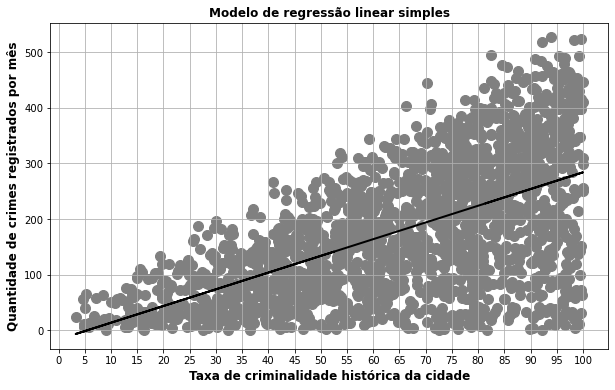

In [11]:
# Construindo o gráfico para visualizar como o modelo se ajusta aos dados
plt.figure(figsize=[10,6])
plt.title("Modelo de regressão linear simples", fontweight='bold', fontsize=12)
plt.scatter(df_treino['taxa_crim'], df_treino['crimes'], s=100, c='gray')
plt.xlabel("Taxa de criminalidade histórica da cidade", fontweight='bold', fontsize=12)
plt.ylabel("Quantidade de crimes registrados por mês", fontweight='bold', fontsize=12)
plt.xticks(range(0, 101, 5))

plt.plot(X, ypred, c='black', lw=2)
plt.grid()

Conseguimos perceber que o modelo descreve muito bem a tendência, entretanto, existem diversos pontos que não são descritos, apesar do valor RMSE relativamento baixo.

Podemos obter os valores de $\Theta_0$ e $\Theta_1$ encontrados pelo modelo usando as funções abaixo. $\Theta_0$ é conhecido como intercepto e $\Theta_1$ é o coeficiente angular da reta.

In [12]:
theta_0, theta_1 = lm.intercept_, lm.coef_
print('Os valores de \u03F4\u2080 e \u03F4\u2081 são %d e %d, respectivamente.' %(theta_0, theta_1))

Os valores de ϴ₀ e ϴ₁ são -16 e 3, respectivamente.


### Usaremos agora o modelo K Nearest Neighbors (pode ser usado para classificação ou regressão linear)

In [13]:
# Instanciando o algorítmo KNN com 3 vizinhos
knn1 = KNeighborsRegressor(n_neighbors=3)

# Aplicando o algorítmo aos dados de treino
knn1.fit(X, Y)

# Calculando os valores preditos
ypred1 = knn1.predict(X)

# Calculando o valor de RMSE considerando o modelo KNN.
RMSE_knn1 = RMSE(Y, ypred1)

print('O valor de RMSE considerando o modelo KNN é %d.' %(RMSE_knn1))

O valor de RMSE considerando o modelo KNN é 79.


O valor de RMSE usando o modelo KNN é menor que o valor RMSE usando o modelo de regressão linear simple quando se usa poucos visízios, entretanto, o modelo tenta descrever todos os dados de treino. Vamos plotar o gráfico para verificar como o modelo KNN se ajusta.

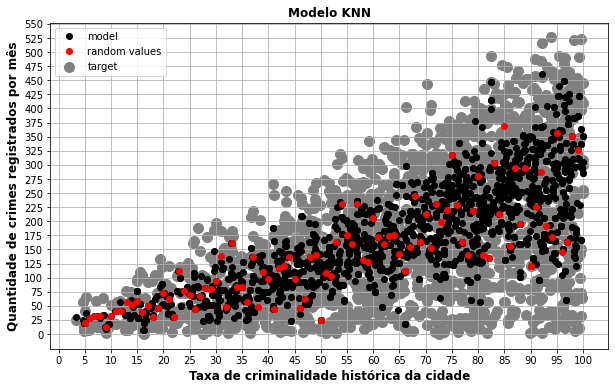

In [14]:
# Construindo o gráfico para visualizar como o modelo se ajusta aos dados
plt.figure(figsize=[10,6])
plt.title("Modelo KNN", fontweight = 'bold', fontsize = 12)
plt.scatter(df_treino['taxa_crim'], df_treino['crimes'], s = 100, c = 'gray', label='target')
plt.xlabel("Taxa de criminalidade histórica da cidade", fontweight='bold', fontsize=12)
plt.ylabel("Quantidade de crimes registrados por mês", fontweight='bold', fontsize=12)
plt.xticks(range(0,101, 5))
plt.yticks(range(0,551, 25))

plt.plot(X, ypred1, c='black', lw=2, marker='o', linestyle='', label='model')
plt.grid()

# Verificando como o modelo se comporta para valores aleatórios de taxa de criminalidade.
a = np.arange(5,100,1).reshape(-1,1)
b = knn1.predict(a)

plt.plot(a, b, color='red', lw=2, marker='o', linestyle='', label='random values')
plt.legend()
plt.show()

Caso utilizássemos o plot com linha para o modelo KNN, não seria possível observar nenhuma tendência nos dados, pois não considerei a ordenação da variável X. Com isso em mente, optei por usar apenas os os marcadores. Os dados em vermelho mostram como o modelo prevê a variável target para valores aleatórios, que podem ou não estar dentro dos dados de treino. Observando o resultado, podemos dizer que o modelo KNN se ajusta bem aos dados de treino. 

É importante notar, que quanto maior o número de vizinhos considerados, maior será o RMSE. Vejamos os casos abaixo. 

O valor de RMSE considerando o modelo KNN é 92.


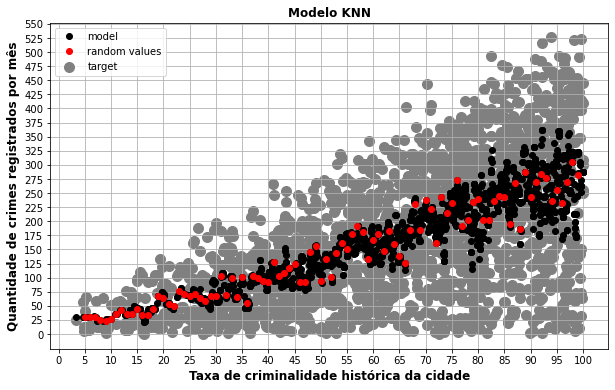

In [15]:
# Instanciando o algorítmo KNN com 10 vizinhos
knn2 = KNeighborsRegressor(n_neighbors=10)

# Aplicando o algorítmo aos dados de treino
knn2.fit(X, Y)

# Calculando os valores preditos
ypred2 = knn2.predict(X)

# Calculando o valor de RMSE considerando o modelo KNN.
RMSE_knn2 = RMSE(Y, ypred2)

print('O valor de RMSE considerando o modelo KNN é %d.' %(RMSE_knn2))

# Construindo o gráfico para visualizar como o modelo se ajusta aos dados
plt.figure(figsize=[10,6])
plt.title("Modelo KNN", fontweight = 'bold', fontsize = 12)
plt.scatter(df_treino['taxa_crim'], df_treino['crimes'], s = 100, c = 'gray', label='target')
plt.xlabel("Taxa de criminalidade histórica da cidade", fontweight='bold', fontsize=12)
plt.ylabel("Quantidade de crimes registrados por mês", fontweight='bold', fontsize=12)
plt.xticks(range(0,101, 5))
plt.yticks(range(0,551, 25))

plt.plot(X, ypred2, color='black', lw=2, marker='o', linestyle='', label='model')
plt.grid()

# Verificando como o modelo se comporta para valores aleatórios de taxa de criminalidade.
a = np.arange(5,100,1).reshape(-1,1)
b = knn2.predict(a)

plt.plot(a, b, color='red', lw=2, marker='o', linestyle='', label='random values')
plt.legend()
plt.show()

O valor de RMSE considerando o modelo KNN é 108.


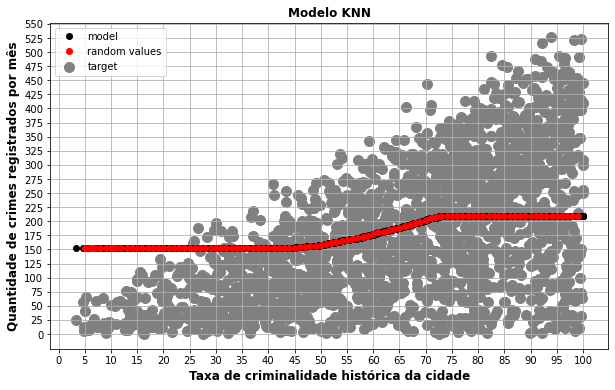

In [16]:
# Instanciando o algorítmo KNN com 1500 vizinhos
knn3 = KNeighborsRegressor(n_neighbors=1500)

# Aplicando o algorítmo aos dados de treino
knn3.fit(X, Y)

# Calculando os valores preditos
ypred3 = knn3.predict(X)

# Calculando o valor de RMSE considerando o modelo KNN.
RMSE_knn3 = RMSE(Y, ypred3)

print('O valor de RMSE considerando o modelo KNN é %d.' %(RMSE_knn3))

# Construindo o gráfico para visualizar como o modelo se ajusta aos dados
plt.figure(figsize=[10,6])
plt.title("Modelo KNN", fontweight = 'bold', fontsize = 12)
plt.scatter(df_treino['taxa_crim'], df_treino['crimes'], s = 100, c = 'gray', label='target')
plt.xlabel("Taxa de criminalidade histórica da cidade", fontweight='bold', fontsize=12)
plt.ylabel("Quantidade de crimes registrados por mês", fontweight='bold', fontsize=12)
plt.xticks(range(0,101, 5))
plt.yticks(range(0,551, 25))

plt.plot(X, ypred3, color='black', lw=2, marker='o', linestyle='', label='model')
plt.grid()

# Verificando como o modelo se comporta para valores aleatórios de taxa de criminalidade.
a = np.arange(5,100,1).reshape(-1,1)
b = knn3.predict(a)

plt.plot(a, b, color='red', lw=2, marker='o', linestyle='', label='random values')
plt.legend()
plt.show()

Percebemos que o aumento do número de vizinhos gera o aumento da RMSE e pode causar, também, o underfitting. 

A diminuição da dispersão ocorre, pois a média do valor target é calculada considerando um maior número de vizinhos.

Apesar da alta dispersão dos dados target, vemos que os modelos descrevem uma tendência de crescimento.

**Dúvidas:** 

- Existe alguma faixa ou limite indicado para o número de vizinhos? 
- É importante verificar a tendência ou o caso anterior é mais adequado aos dados?

A seguir, iremos verificar como os modelos respondem aos dados de teste.

O valor de RMSE considerando o modelo de regressão linear simples é 100.


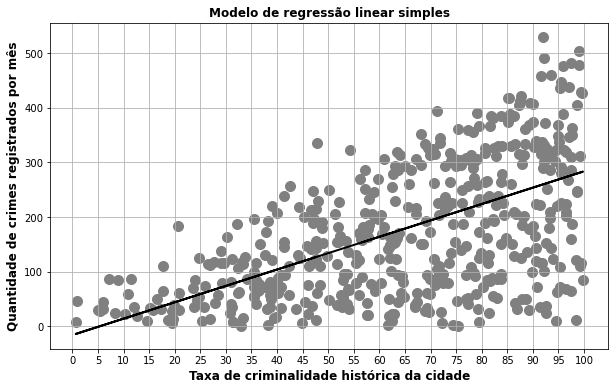

In [17]:
# Cópia da tabela de teste:
df_testeA = df_teste.copy()

# Aplicando o modelo de regressão linear nos dados de teste
Xt = df_teste['taxa_crim'].values.reshape(-1,1)
Yt = df_teste['crimes'].values.reshape(-1,1)

# Valores preditos a partir do modelo treinado
ypredt = lm.predict(Xt)

# Por último, calcularemos o RMSE usando os valores preditos pelo modelo de regressão linear.
RMSE_mrt = RMSE(Yt, ypredt)

print('O valor de RMSE considerando o modelo de regressão linear simples é %d.' %(RMSE_mrt))

# Construindo o gráfico para visualizar como o modelo se ajusta aos dados de teste
plt.figure(figsize=[10,6])
plt.title("Modelo de regressão linear simples", fontweight='bold', fontsize=12)
plt.scatter(df_teste['taxa_crim'], df_teste['crimes'], s=100, c='gray')
plt.xlabel("Taxa de criminalidade histórica da cidade", fontweight='bold', fontsize=12)
plt.ylabel("Quantidade de crimes registrados por mês", fontweight='bold', fontsize=12)
plt.xticks(range(0, 101, 5))

plt.plot(Xt, ypredt, c='black', lw=2)
plt.grid()

Percebemos que o modelo de regressão linear simples representa de uma maneira relativamente boa o valor target dos dados de teste, uma vez que o RMSE foi até menor para os mesmos.

In [18]:
# Adicionando o valor predito à tabela
df_testeA['Yhat'] = ypredt

# Determinando a diferença percentual entre a variável target dos dados de teste e o valor predito
dif = []
for item1, item2 in zip(df_testeA['crimes'], df_testeA['Yhat']):
    if (item1 == 0):
        dif.append(500)
    else:
        dif.append(((item1 - item2)/item1)*100)

dif = np.array(dif).reshape(-1,1)

print('A maior diferença (absoluta) entre a variável target dos dados de teste e o valor predito é:', end=' ')
print(np.max(abs(dif)), end=' ')
print(' %.', end='\n')
print('A menor diferença (absoluta) entre a variável target dos dados de teste e o valor predito é:', end=' ')
print(np.min(abs(dif)), end=' ')
print(' %.')

# Adicionando dif %
df_testeA['dif %'] = dif

# Imprimindo a tabela
df_testeA.head()

A maior diferença (absoluta) entre a variável target dos dados de teste e o valor predito é: 20890.877732420675  %.
A menor diferença (absoluta) entre a variável target dos dados de teste e o valor predito é: 0.45760188867587936  %.


,ind_pop_cid,perc_pol,taxa_crim,nivel_ed,crimes,Yhat,dif %
1583,2.0,5.011095,47.611034,8.0,124,126.720199,-2.193709
39,5.0,8.091991,32.353644,9.0,61,80.947599,-32.700981
192,5.0,2.811208,38.921669,3.0,221,100.651858,54.456173
146,4.0,16.802162,38.546419,8.0,57,99.526098,-74.607189
1210,3.0,19.447267,36.567842,2.0,78,93.590311,-19.987578


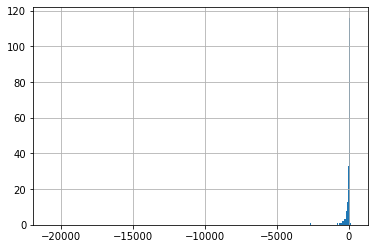

In [19]:
# Histograma mostrado a distribuição da dif %.
hist = df_testeA['dif %'].hist(bins=1000)

Agora testaremos para os modelos KNN (com 3, 10 e 1500 vizinhos).

O valor de RMSE considerando o modelo KNN é 112.


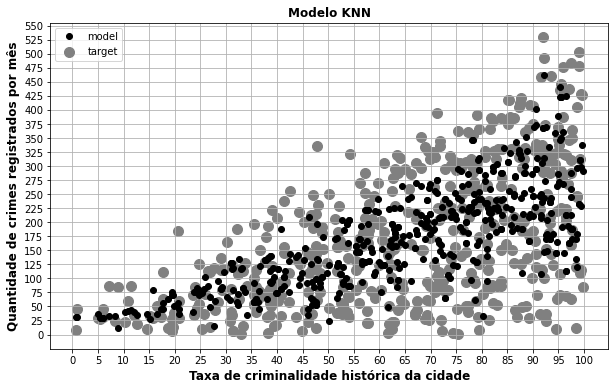

In [20]:
# KNN - 3 vizinhos
# Calculando os valores preditos
ypred1t = knn1.predict(Xt)

# Calculando o valor de RMSE considerando o modelo KNN.
RMSE_knn1t = RMSE(Yt, ypred1t)

print('O valor de RMSE considerando o modelo KNN é %d.' %(RMSE_knn1t))

# Construindo o gráfico para visualizar como o modelo se ajusta aos dados
plt.figure(figsize=[10,6])
plt.title("Modelo KNN", fontweight = 'bold', fontsize = 12)
plt.scatter(df_teste['taxa_crim'], df_teste['crimes'], s = 100, c = 'gray', label='target')
plt.xlabel("Taxa de criminalidade histórica da cidade", fontweight='bold', fontsize=12)
plt.ylabel("Quantidade de crimes registrados por mês", fontweight='bold', fontsize=12)
plt.xticks(range(0,101, 5))
plt.yticks(range(0,551, 25))

plt.plot(Xt, ypred1t, c='black', lw=2, marker='o', linestyle='', label='model')
plt.grid()

plt.legend()
plt.show()

Verificamos um leve aumento do valor de RMSE em relação aos dados de treino, mas o modelo com 3 vizinhos se ajusta bem aos dados de teste como pode ser visualizado no gráfico.

O valor de RMSE considerando o modelo KNN é 103.


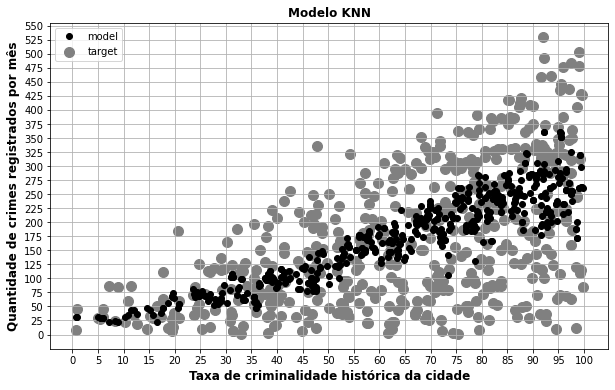

In [21]:
# KNN - 10 vizinhos
# Calculando os valores preditos
ypred2t = knn2.predict(Xt)

# Calculando o valor de RMSE considerando o modelo KNN.
RMSE_knn2t = RMSE(Yt, ypred2t)

print('O valor de RMSE considerando o modelo KNN é %d.' %(RMSE_knn2t))

# Construindo o gráfico para visualizar como o modelo se ajusta aos dados
plt.figure(figsize=[10,6])
plt.title("Modelo KNN", fontweight = 'bold', fontsize = 12)
plt.scatter(df_teste['taxa_crim'], df_teste['crimes'], s = 100, c = 'gray', label='target')
plt.xlabel("Taxa de criminalidade histórica da cidade", fontweight='bold', fontsize=12)
plt.ylabel("Quantidade de crimes registrados por mês", fontweight='bold', fontsize=12)
plt.xticks(range(0,101, 5))
plt.yticks(range(0,551, 25))

plt.plot(Xt, ypred2t, c='black', lw=2, marker='o', linestyle='', label='model')
plt.grid()

plt.legend()
plt.show()

Apesar da diminuição do RMSE em relação ao KNN com 3 vizinhos, podemos perceber que o modelo com 10 vizinhos tende a representar uma tendência média, assim como o modelo de regressão linear.

O valor de RMSE considerando o modelo KNN é 110.


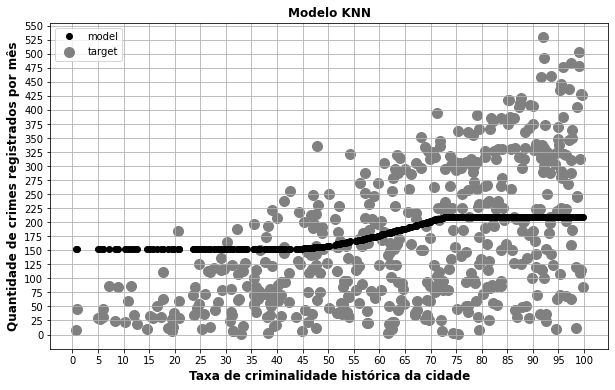

In [22]:
# KNN - 10 vizinhos
# Calculando os valores preditos
ypred3t = knn3.predict(Xt)

# Calculando o valor de RMSE considerando o modelo KNN.
RMSE_knn3t = RMSE(Yt, ypred3t)

print('O valor de RMSE considerando o modelo KNN é %d.' %(RMSE_knn3t))

# Construindo o gráfico para visualizar como o modelo se ajusta aos dados
plt.figure(figsize=[10,6])
plt.title("Modelo KNN", fontweight = 'bold', fontsize = 12)
plt.scatter(df_teste['taxa_crim'], df_teste['crimes'], s = 100, c = 'gray', label='target')
plt.xlabel("Taxa de criminalidade histórica da cidade", fontweight='bold', fontsize=12)
plt.ylabel("Quantidade de crimes registrados por mês", fontweight='bold', fontsize=12)
plt.xticks(range(0,101, 5))
plt.yticks(range(0,551, 25))

plt.plot(Xt, ypred3t, c='black', lw=2, marker='o', linestyle='', label='model')
plt.grid()

plt.legend()
plt.show()

Como comentado anteriormente, o modelo com 1500 vizinhos não representou de maneira adequada nem os dados de treino, nem os dados de teste (underfitting).

Com exceção do modelo KNN com 3 vizinhos, os modelos de regressão linear simples e o KNN com 10 vizinhos mostram uma tendência média. Por outro lado, o modelo com 3 vizinhos se ajustou bem aos dados de treino e de teste.

*Não consegui identificar nenhum caso de overfitting, caso tenha ocorrido, poderia me indicar, por gentileza?*

### 2 - 

Agora, usando todas as variáveis disponíveis, refaça as análises do primeiro exercício e compare os resultados.


### MODELO DE REGRESSÃO LINEAR

In [23]:
# Considerando todas as variáveis: Modelo de regressão linear simples
# Instanciando o modelo de regressão linear.
lm = LinearRegression()
X = []

# Transformando as variáveis do dataframe (series) para numpy array
for item in df_treino.columns:
    if (item != 'crimes'):
        X.append(df_treino[item].values.reshape(-1,1))
    else:
        Y = df_treino[item].values.reshape(-1,1)
X = np.array(X).reshape(len(X[0]),len(X))

# Treinando o modelo
lm.fit(X,Y)

# Valores preditos a partir do modelo treinado
ypred = lm.predict(X)

# Por último, calcularemos o RMSE usando os valores preditos pelo modelo de regressão linear.
RMSE_mr = RMSE(Y, ypred)

print('O valor de RMSE do modelo de regressão linear simples é %d.' %(RMSE_mr))

O valor de RMSE do modelo de regressão linear simples é 119.


In [24]:
theta_0, theta_1 = lm.intercept_, lm.coef_
print('O valor do intercepto é', end=' ')
print(theta_0[0], end='\n')
i = 1
for item in theta_1[0]:
    print('O valor do coeficiente %d é' %(i), end=' ')
    print(item, end='\n')
    i += 1

O valor do intercepto é 186.18912386899393
O valor do coeficiente 1 é -0.2104538121025283
O valor do coeficiente 2 é 0.04280682267608877
O valor do coeficiente 3 é -0.21830059574705282
O valor do coeficiente 4 é 0.06461838844552435


In [25]:
# Criando cópia dos dados de treino.
df_treino1 = df_treino.copy()

# Inserindo a coluna com os valores preditos
df_treino1['Yhat'] = ypred

# Determinando a diferença percentual entre a variável target dos dados de teste e o valor predito
dif_per = []
for item1, item2 in zip(df_treino1['crimes'], df_treino1['Yhat']):
    if (item1 == 0):
        dif_per.append(500)
    else:
        dif_per.append(((item1 - item2)/item1)*100)

dif_per = np.array(dif_per).reshape(-1,1)

# Inserindo a diferença entre a variável target e o valor predito
df_treino1['dif %'] = dif_per

# Imprimindo o dataframe:
df_treino1.head()

,ind_pop_cid,perc_pol,taxa_crim,nivel_ed,crimes,Yhat,dif %
611,4.0,4.091551,52.447571,4.0,253,185.430288,26.707396
778,1.0,21.185762,51.698810,6.0,21,185.481847,-783.246891
2307,1.0,7.849608,76.965343,6.0,294,185.851196,36.785307
2417,4.0,5.618181,91.118065,2.0,431,184.624338,57.163727
1036,2.0,11.941626,31.295252,2.0,122,185.109864,-51.729397


In [26]:
print('A maior diferença (absoluta) entre a variável target dos dados de teste e o valor predito é:', end=' ')
print(np.max(abs(dif_per)), end=' ')
print(' %.', end='\n')
print('A menor diferença (absoluta) entre a variável target dos dados de teste e o valor predito é:', end=' ')
print(np.min(abs(dif_per)), end=' ')
print(' %.')

A maior diferença (absoluta) entre a variável target dos dados de teste e o valor predito é: 18476.476607128505  %.
A menor diferença (absoluta) entre a variável target dos dados de teste e o valor predito é: 0.04302393035242698  %.


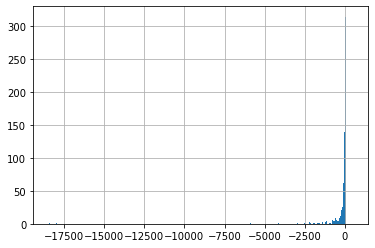

In [27]:
# Histograma mostrado a distribuição da dif %.
hist = df_treino1['dif %'].hist(bins=1000)

O histograma mostra que a dispersão ocorre ao redor de 0, mas pode apresentar valores bem distantes do valor target.

In [28]:
# Aplicando o modelo treinado nos dados de teste
Xt = []
for item in df_teste.columns:
    if (item != 'crimes'):
        Xt.append(df_teste[item].values.reshape(-1,1))
    else:
        Yt = df_teste[item].values.reshape(-1,1)

Xt = np.array(Xt).reshape(len(Xt[0]),len(Xt))

# Criando uma cópia do dataframe de teste
df_teste1 = df_teste.copy()

# Aplicando o modelo
ypredt = lm.predict(Xt)

# Por último, calcularemos o RMSE usando os valores preditos pelo modelo de regressão linear.
RMSE_mrt = RMSE(Yt, ypredt)

print('O valor de RMSE do modelo de regressão linear simples é %d.' %(RMSE_mrt))

# Criando a coluna com os valores preditos
df_teste1['Yhat'] = ypredt

O valor de RMSE do modelo de regressão linear simples é 121.


In [29]:
# Determinando a diferença percentual entre a variável target dos dados de teste e o valor predito
dif_per = []
for item1, item2 in zip(df_teste1['crimes'], df_teste1['Yhat']):
    dif_per.append(((item1 - item2)/item1)*100)


dif_per = np.array(dif_per).reshape(-1,1)

# Adicionando a coluna com a diferença percentual.
df_teste1['dif %'] = dif_per

In [30]:
# Imprimindo o dataframe de teste com as colunas adicionadas
df_teste1.head()

,ind_pop_cid,perc_pol,taxa_crim,nivel_ed,crimes,Yhat,dif %
1583,2.0,5.011095,47.611034,8.0,124,185.149221,-49.313888
39,5.0,8.091991,32.353644,9.0,61,184.963213,-203.218381
192,5.0,2.811208,38.921669,3.0,221,185.111593,16.239098
146,4.0,16.802162,38.546419,8.0,57,185.599787,-225.613661
1210,3.0,19.447267,36.567842,2.0,78,185.117711,-137.330399


In [31]:
print('A maior diferença (absoluta) entre a variável target dos dados de teste e o valor predito é:', end=' ')
print(np.max(abs(dif_per)), end=' ')
print(' %.', end='\n')
print('A menor diferença (absoluta) entre a variável target dos dados de teste e o valor predito é:', end=' ')
print(np.min(abs(dif_per)), end=' ')
print(' %.')

A maior diferença (absoluta) entre a variável target dos dados de teste e o valor predito é: 18432.644349145125  %.
A menor diferença (absoluta) entre a variável target dos dados de teste e o valor predito é: 0.04302393035242698  %.


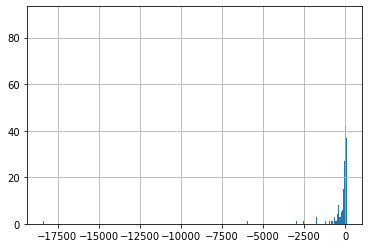

In [32]:
# Histograma mostrado a distribuição da dif %.
hist = df_teste1['dif %'].hist(bins=1000)

Assim como ocorre com os dados de treino, existem diversos dados do modelo que apresentam diferenças pequenas com a variável target, mas existe diferenças que podem chegar a 17700%.

Agora usaremos o modelo KNN com 3 vizinhos e verifcaremos qual se ajusta melhor.

### MODELO KNN - 3 VIZINHOS

In [33]:
# Instanciando o algorítmo KNN com 3 vizinhos
knn1 = KNeighborsRegressor(n_neighbors=3)

# Aplicando o algorítmo aos dados de treino
knn1.fit(X, Y)

# Calculando os valores preditos
ypred1 = knn1.predict(X)

# Calculando o valor de RMSE considerando o modelo KNN.
RMSE_knn1 = RMSE(Y, ypred1)

print('O valor de RMSE considerando o modelo KNN é %d.' %(RMSE_knn1))

# Criando uma cópia do dataframe de teste
df_treino2 = df_treino.copy()

# Criando a coluna com os valores preditos
df_treino2['Yhat'] = ypred1

# Determinando a diferença percentual entre a variável target dos dados de teste e o valor predito
dif_per = []
for item1, item2 in zip(df_treino2['crimes'], df_treino2['Yhat']):
    if (item1 == 0):
        dif_per.append(500)
    else:
        dif_per.append(((item1 - item2)/item1)*100)

dif_per = np.array(dif_per).reshape(-1,1)

# Adicionando a coluna com a diferença percentual.
df_treino2['dif %'] = dif_per

print('A maior diferença (absoluta) entre a variável target dos dados de teste e o valor predito é:', end=' ')
print(np.max(abs(dif_per)), end=' ')
print(' %.', end='\n')
print('A menor diferença (absoluta) entre a variável target dos dados de teste e o valor predito é:', end=' ')
print(np.min(abs(dif_per)), end=' ')
print(' %.')

# Imprimindo o dataframe de teste com as colunas adicionadas
df_treino2.head()

O valor de RMSE considerando o modelo KNN é 98.
A maior diferença (absoluta) entre a variável target dos dados de teste e o valor predito é: 24366.666666666664  %.
A menor diferença (absoluta) entre a variável target dos dados de teste e o valor predito é: 0.0  %.


,ind_pop_cid,perc_pol,taxa_crim,nivel_ed,crimes,Yhat,dif %
611,4.0,4.091551,52.447571,4.0,253,182.666667,27.799736
778,1.0,21.185762,51.698810,6.0,21,101.333333,-382.539683
2307,1.0,7.849608,76.965343,6.0,294,176.000000,40.136054
2417,4.0,5.618181,91.118065,2.0,431,281.000000,34.802784
1036,2.0,11.941626,31.295252,2.0,122,158.000000,-29.508197


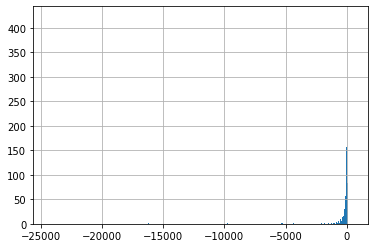

In [34]:
# Histograma mostrado a distribuição da dif %.
hist = df_treino2['dif %'].hist(bins=1000)

In [35]:
# Criando uma cópia do dataframe de teste
df_teste2 = df_teste.copy()

# Aplicando o modelo
ypredt2 = knn1.predict(Xt)

# Por último, calcularemos o RMSE usando os valores preditos pelo modelo de regressão linear.
RMSE_mrt2 = RMSE(Yt, ypredt2)

print('O valor de RMSE do modelo de regressão linear simples é %d.' %(RMSE_mrt2))

# Criando a coluna com os valores preditos
df_teste2['Yhat'] = ypredt2

# Determinando a diferença percentual entre a variável target dos dados de teste e o valor predito
dif_per = []
for item1, item2 in zip(df_teste2['crimes'], df_teste2['Yhat']):
    dif_per.append(((item1 - item2)/item1)*100)

dif_per = np.array(dif_per).reshape(-1,1)

# Adicionando a coluna com a diferença percentual.
df_teste2['dif %'] = dif_per

# Imprimindo o dataframe de teste com as colunas adicionadas
df_teste2.head()

O valor de RMSE do modelo de regressão linear simples é 137.


,ind_pop_cid,perc_pol,taxa_crim,nivel_ed,crimes,Yhat,dif %
1583,2.0,5.011095,47.611034,8.0,124,128.333333,-3.494624
39,5.0,8.091991,32.353644,9.0,61,151.666667,-148.633880
192,5.0,2.811208,38.921669,3.0,221,314.000000,-42.081448
146,4.0,16.802162,38.546419,8.0,57,200.666667,-252.046784
1210,3.0,19.447267,36.567842,2.0,78,113.000000,-44.871795


In [36]:
print('A maior diferença (absoluta) entre a variável target dos dados de teste e o valor predito é:', end=' ')
print(np.max(abs(dif_per)), end=' ')
print(' %.', end='\n')
print('A menor diferença (absoluta) entre a variável target dos dados de teste e o valor predito é:', end=' ')
print(np.min(abs(dif_per)), end=' ')
print(' %.')

A maior diferença (absoluta) entre a variável target dos dados de teste e o valor predito é: 18833.333333333336  %.
A menor diferença (absoluta) entre a variável target dos dados de teste e o valor predito é: 0.38314176245210185  %.


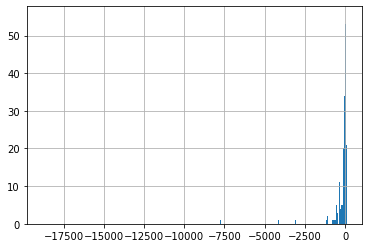

In [37]:
# Histograma mostrado a distribuição da dif %.
hist = df_teste2['dif %'].hist(bins=1000)

Percebemos que o modelo KNN se ajusta melhor aos dados, considerando todas as variáveis, pois o mesmo apresenta menor valor máximo de diferença. Testaremos agora o modelo com as variáveis com índice de correlação negativo apenas. Sendo assim, removeremos as variáveis 'ind_pop_cid' e 'taxa_crim'.

In [38]:
# Determinando o índice de correlação de Pearson das variáveis com a variável target.
df[df.columns[0:]].corr()['crimes'][:-1]

ind_pop_cid    0.067237
perc_pol      -0.377929
taxa_crim      0.578659
nivel_ed      -0.200762
Name: crimes, dtype: float64

Percebemos que o índice de correlação da variável ind_pop_cid é a que pior descreve a variável target.

In [39]:
# Removedo a coluna 'ind_pop_cid'
df1 = df.copy()
df1.drop('ind_pop_cid', axis=1, inplace=True)
df1.head()

,perc_pol,taxa_crim,nivel_ed,crimes
0,7.185471,62.082693,10.0,77
1,24.456750,88.244380,6.0,202
2,19.791772,94.930257,1.0,348
3,10.089496,41.791507,6.0,114
4,34.697495,67.615795,1.0,47


In [40]:
# Criando os dataframes de treino e teste.
df_tr, df_te = divide_dados(df1, p = 0.8)

O dataframe original possui 2460 linhas e 4 colunas.

***** OS DF DE TREINO E DE TESTE FORAM CRIADOS A PARTIR DO DF ORIGINAL APÓS UMA ORGANIZAÇÃO ALEATÓRIA DAS LINHAS. *****

O dataframe de treino poussi 1968 linhas e 4 colunas.

O dataframe de teste poussi 492 linhas e 4 colunas.

A soma do número de linhas dos dataframes de treino e de teste é 2460.


In [41]:
# Transformando as variáveis do dataframe (series) para numpy array
X = []
for item in df_tr.columns:
    if (item != 'crimes'):
        X.append(df_tr[item].values.reshape(-1,1))
    else:
        Y = df_tr[item].values.reshape(-1,1)

# Transformando a lista para um numpy array
X = np.array(X).reshape(len(X[0]),len(X))

# Instanciando o algorítmo KNN com 3 vizinhos
knn = KNeighborsRegressor(n_neighbors=3)

# Aplicando o algorítmo aos dados de treino
knn.fit(X, Y)

# Calculando os valores preditos
ypred = knn.predict(X)

# Calculando o valor de RMSE considerando o modelo KNN.
RMSE_knn = RMSE(Y, ypred)

print('O valor de RMSE considerando o modelo KNN é %d.' %(RMSE_knn))

# Criando uma cópia do dataframe de teste
df_tr2 = df_tr.copy()

# Criando a coluna com os valores preditos
df_tr2['Yhat'] = ypred

# Determinando a diferença percentual entre a variável target dos dados de teste e o valor predito
dif_per = []
for item1, item2 in zip(df_tr2['crimes'], df_tr2['Yhat']):
    if (item1 == 0):
        dif_per.append(500)
    else:
        dif_per.append(((item1 - item2)/item1)*100)

dif_per = np.array(dif_per).reshape(-1,1)

# Adicionando a coluna com a diferença percentual.
df_tr2['dif %'] = dif_per

print('A maior diferença (absoluta) entre a variável target dos dados de teste e o valor predito é:', end=' ')
print(np.max(abs(dif_per)), end=' ')
print(' %.', end='\n')
print('A menor diferença (absoluta) entre a variável target dos dados de teste e o valor predito é:', end=' ')
print(np.min(abs(dif_per)), end=' ')
print(' %.')

# Imprimindo o dataframe de teste com as colunas adicionadas
df_tr2.head()

O valor de RMSE considerando o modelo KNN é 99.
A maior diferença (absoluta) entre a variável target dos dados de teste e o valor predito é: 23066.666666666664  %.
A menor diferença (absoluta) entre a variável target dos dados de teste e o valor predito é: 0.0  %.


,perc_pol,taxa_crim,nivel_ed,crimes,Yhat,dif %
2109,26.589229,87.306951,1.0,316,229.666667,27.320675
2211,6.851682,72.634555,4.0,315,223.666667,28.994709
1251,11.974421,86.557441,10.0,268,192.666667,28.109453
909,12.826205,67.814954,2.0,289,273.000000,5.536332
2296,22.390769,60.285600,10.0,77,177.333333,-130.303030


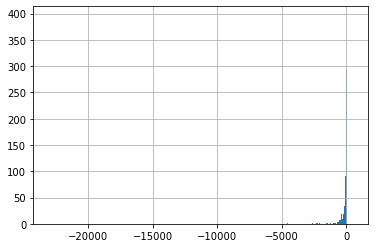

In [42]:
# Histograma mostrado a distribuição da dif %.
hist = df_tr2['dif %'].hist(bins=1000)

Aplicando aos dados de teste.

In [44]:
# Aplicando o modelo treinado nos dados de teste
Xt = []
for item in df_te.columns:
    if (item != 'crimes'):
        Xt.append(df_te[item].values.reshape(-1,1))
    else:
        Yt = df_te[item].values.reshape(-1,1)

Xt = np.array(Xt).reshape(len(Xt[0]),len(Xt))

# Criando uma cópia do dataframe de teste
df_te2 = df_te.copy()

# Aplicando o modelo
ypredt = knn.predict(Xt)

# Por último, calcularemos o RMSE usando os valores preditos pelo modelo de regressão linear.
RMSE_mrt = RMSE(Yt, ypredt)

print('O valor de RMSE do modelo de regressão linear simples é %d.' %(RMSE_mrt2))

# Criando a coluna com os valores preditos
df_te2['Yhat'] = ypredt

# Determinando a diferença percentual entre a variável target dos dados de teste e o valor predito
dif_per = []
for item1, item2 in zip(df_te2['crimes'], df_te2['Yhat']):
    if (item1 == 0):
        dif_per.append(500)
    else:
        dif_per.append(((item1 - item2)/item1)*100)

dif_per = np.array(dif_per).reshape(-1,1)

# Adicionando a coluna com a diferença percentual.
df_te2['dif %'] = dif_per

print('A maior diferença (absoluta) entre a variável target dos dados de teste e o valor predito é:', end=' ')
print(np.max(abs(dif_per)), end=' ')
print(' %.', end='\n')
print('A menor diferença (absoluta) entre a variável target dos dados de teste e o valor predito é:', end=' ')
print(np.min(abs(dif_per)), end=' ')
print(' %.')

# Imprimindo o dataframe de teste com as colunas adicionadas
df_te2.head()

O valor de RMSE do modelo de regressão linear simples é 137.
A maior diferença (absoluta) entre a variável target dos dados de teste e o valor predito é: 15133.333333333334  %.
A menor diferença (absoluta) entre a variável target dos dados de teste e o valor predito é: 0.3100775193798405  %.


,perc_pol,taxa_crim,nivel_ed,crimes,Yhat,dif %
1108,21.314639,84.136263,6.0,247,144.333333,41.565452
1875,11.227532,69.734679,1.0,305,211.666667,30.601093
2048,2.191596,60.557856,8.0,169,137.666667,18.540434
627,26.276525,88.823137,6.0,136,66.000000,51.470588
2366,24.963873,35.843027,3.0,20,218.333333,-991.666667


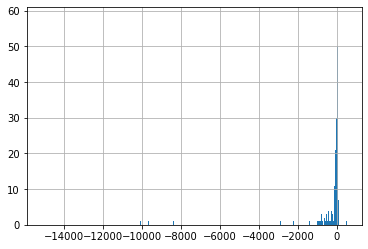

In [45]:
# Histograma mostrado a distribuição da dif %.
hist = df_te2['dif %'].hist(bins=1000)

Verificamos que removendo a variável 'ind_pop_cid', a diferença máxima entre o valor predito e a variável target cai para 15133%. Usaremos agora apenas duas variáveis para tentar descrever a variável target.

In [46]:
# Determinando o índice de correlação de Pearson das variáveis com a variável target.
df[df.columns[0:]].corr()['crimes'][:-1]

ind_pop_cid    0.067237
perc_pol      -0.377929
taxa_crim      0.578659
nivel_ed      -0.200762
Name: crimes, dtype: float64

In [47]:
# Removedo a coluna 'ind_pop_cid' e taxa_crim
df2 = df.copy()
df2.drop('ind_pop_cid', axis=1, inplace=True)
df2.drop('taxa_crim', axis=1, inplace=True)

# Criando os dataframes de treino e teste.
df2_tr, df2_te = divide_dados(df2, p = 0.8)

# Transformando as variáveis do dataframe (series) para numpy array
X = []
for item in df2_tr.columns:
    if (item != 'crimes'):
        X.append(df2_tr[item].values.reshape(-1,1))
    else:
        Y = df2_tr[item].values.reshape(-1,1)

# Transformando a lista para um numpy array
X = np.array(X).reshape(len(X[0]),len(X))

# Instanciando o algorítmo KNN com 3 vizinhos
knn = KNeighborsRegressor(n_neighbors=3)

# Aplicando o algorítmo aos dados de treino
knn.fit(X, Y)

# Calculando os valores preditos
ypred = knn.predict(X)

# Calculando o valor de RMSE considerando o modelo KNN.
RMSE_knn = RMSE(Y, ypred)

print('O valor de RMSE considerando o modelo KNN é %d.' %(RMSE_knn))

# Criando uma cópia do dataframe de teste
df2_tr2 = df_tr2.copy()

# Criando a coluna com os valores preditos
df2_tr2['Yhat'] = ypred

# Determinando a diferença percentual entre a variável target dos dados de teste e o valor predito
dif = []
for item1, item2 in zip(df2_tr2['crimes'], df2_tr2['Yhat']):
    if (item1 == 0):
        dif.append(500)
    else:
        dif.append(((item1 - item2)/item1)*100)

dif = np.array(dif).reshape(-1,1)

# Adicionando a coluna com a diferença percentual.
df2_tr2['dif %'] = dif

print('A maior diferença (absoluta) entre a variável target dos dados de teste e o valor predito é:', end=' ')
print(np.max(abs(dif_per)), end=' ')
print(' %.', end='\n')
print('A menor diferença (absoluta) entre a variável target dos dados de teste e o valor predito é:', end=' ')
print(np.min(abs(dif_per)), end=' ')
print(' %.')

# Imprimindo o dataframe de teste com as colunas adicionadas
df2_tr2.head()

O dataframe original possui 2460 linhas e 3 colunas.

***** OS DF DE TREINO E DE TESTE FORAM CRIADOS A PARTIR DO DF ORIGINAL APÓS UMA ORGANIZAÇÃO ALEATÓRIA DAS LINHAS. *****

O dataframe de treino poussi 1968 linhas e 3 colunas.

O dataframe de teste poussi 492 linhas e 3 colunas.

A soma do número de linhas dos dataframes de treino e de teste é 2460.
O valor de RMSE considerando o modelo KNN é 112.
A maior diferença (absoluta) entre a variável target dos dados de teste e o valor predito é: 15133.333333333334  %.
A menor diferença (absoluta) entre a variável target dos dados de teste e o valor predito é: 0.3100775193798405  %.


,perc_pol,taxa_crim,nivel_ed,crimes,Yhat,dif %
2109,26.589229,87.306951,1.0,316,174.333333,44.831224
2211,6.851682,72.634555,4.0,315,191.000000,39.365079
1251,11.974421,86.557441,10.0,268,99.333333,62.935323
909,12.826205,67.814954,2.0,289,158.333333,45.213379
2296,22.390769,60.285600,10.0,77,170.333333,-121.212121


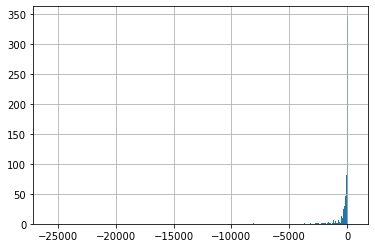

In [48]:
# Histograma mostrado a distribuição da dif %.
hist = df2_tr2['dif %'].hist(bins=1000)

In [50]:
# Aplicando o modelo treinado nos dados de teste
Xt = []
for item in df2_te.columns:
    if (item != 'crimes'):
        Xt.append(df2_te[item].values.reshape(-1,1))
    else:
        Yt = df2_te[item].values.reshape(-1,1)

Xt = np.array(Xt).reshape(len(Xt[0]),len(Xt))

# Criando uma cópia do dataframe de teste
df2_te2 = df2_te.copy()

# Aplicando o modelo
ypredt = knn.predict(Xt)

# Por último, calcularemos o RMSE usando os valores preditos pelo modelo de regressão linear.
RMSE_mrt = RMSE(Yt, ypredt)

print('O valor de RMSE do modelo de regressão linear simples é %d.' %(RMSE_mrt2))

# Criando a coluna com os valores preditos
df2_te2['Yhat'] = ypredt

# Determinando a diferença percentual entre a variável target dos dados de teste e o valor predito
dif = []
for item1, item2 in zip(df2_te2['crimes'], df2_te2['Yhat']):
    dif.append(((item1 - item2)/item1)*100)

dif = np.array(dif).reshape(-1,1)

# Adicionando a coluna com a diferença percentual.
df2_te2['dif %'] = dif

print('A maior diferença (absoluta) entre a variável target dos dados de teste e o valor predito é:', end=' ')
print(np.max(abs(dif)), end=' ')
print(' %.', end='\n')
print('A menor diferença (absoluta) entre a variável target dos dados de teste e o valor predito é:', end=' ')
print(np.min(abs(dif)), end=' ')
print(' %.')

# Imprimindo o dataframe de teste com as colunas adicionadas
df2_te2.head()

O valor de RMSE do modelo de regressão linear simples é 137.
A maior diferença (absoluta) entre a variável target dos dados de teste e o valor predito é: 8988.88888888889  %.
A menor diferença (absoluta) entre a variável target dos dados de teste e o valor predito é: 0.23310023310023972  %.


,perc_pol,nivel_ed,crimes,Yhat,dif %
1053,32.184572,6.0,27,127.333333,-371.604938
663,13.202075,2.0,100,192.333333,-92.333333
153,5.828146,9.0,248,175.000000,29.435484
1281,18.744009,3.0,328,149.000000,54.573171
1160,0.791845,7.0,185,67.000000,63.783784


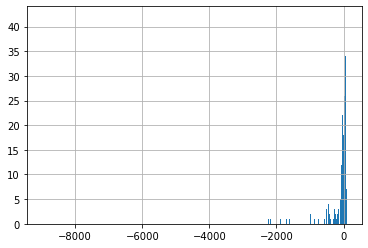

In [51]:
# Histograma mostrado a distribuição da dif %.
hist = df2_te2['dif %'].hist(bins=1000)

Usando apenas as variáveis com índice de correlação negativo, a diferença absoluta cai para 8988 % para os dados de teste, enquanto para o caso anterior com três variáveis esse valor era igual a 15133%.

# Dúvidas:

1. Qual a melhor forma de plotar o resultado quando se tem três ou mais variáveis? Para o exercício em questão, qual é a melhor forma de apresentar graficamente os resultados usando todas as variáveis na parte 2?

<br>

2. A melhor (ou mais rápida) forma de identificar as variáveis mais importantes para a seleção é através do índice de correlação de Pearson? Qual outra forma posso utilizar?

<br>

3. Vemos que para o caso estudado, existem diferenças entre o valor predito e o valor target de 8988% até valores bem maiores. Confesso que não me preocupei em verificar os outliers nesse caso, essas diferenças ocorrerm por quais motivos:
- Eu deveria ter verificado os outliers e tratado de maneira diferenciada?
- Os modelos de regressão linear e KNN não são adequados para descrever os dados fornecidos?
- Eu não realizei o tratamento correto dos dados e, consequentemente, isso se reflete na diferença?
- Todas as opções acima.

<br>

4. Na seleção das variáveis para criar os modelos de regressão linear e KNN podemos levar em consideração tanto índices negativos, quanto positivos ao mesmo tempo? Quando usei somente as variáveis com índice de correlação negativo, a diferença do valor predito e do valor target diminuiu bastante. Foi apenas uma coincidência ou podemos dizer que em outros casos iremos observar esse mesmo comportamento? Ou seja, índices de correlação com valor negativo podem "atrapalhar" o modelo quando usadas com índices de correlação positivo (acredito que não, mas não custa perguntar)?

<br>

5. Vemos que o RMSE é relativamente baixo, mas para o caso em questão, temos uma alta dispersão da variável target com outras duas variáveis. Podemos dizer que os modelos, nesse caso, irão fornecer apenas uma ideia do comportamento dos dados?

<br>

6. Seria viável dividir os dados em vários grupos e realizar o tratamento por partes? Por exemplo, filtar os dados por alguma categoria e realizar a mesma análise para cada os N valores dessa determinada categoria. Imagino que o custo computacional seria muito maior, mas que poderíamos ganhar em precisão. O contra seria ter N modelos para descrever a variável target, um para cada valor dentro de N.

<br>

7. Eu posso usar partes dos exercícios e os dados fornecidos durante os módulos para criar projetos e colocar no meu GitHub como um repositório público? Não os exercícios resolvidos, mas utilizaria os dados, faria o pré processamento e análise dos mesmos, assim como a implementação de modelos de aprendizado de máquina. Mencionaria, claro, que os dados foram fornecidos pelo Mentorama e que o projeto seria uma continuação ou extensão de um ou outro exercício daqui.